In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
#as rename 
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [ ]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/Be-Cenzo/SpaceAI/main/Dataset/"
FILE_PATH = os.path.join("Dataset")
FILE_URL1 = DOWNLOAD_ROOT + "star_classification.csv"


def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "star_classification.csv")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()

In [3]:
#load our data
datapath = os.path.join("Dataset", "")

stars = pd.read_csv(datapath + "star_classification.csv")

In [4]:
#distribution of data
print(stars.describe())

             obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      1

In [5]:
#start to look into missing data
print(stars.head(20))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

          obj_ID       alpha      delta         u         g         r  \
0   1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1   1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2   1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3   1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4   1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
5   1.237680e+18  340.995121  20.589476  23.48827  23.33776  21.32195   
6   1.237679e+18   23.234926  11.418188  21.46973  21.17624  20.92829   
7   1.237679e+18    5.433176  12.065186  22.24979  22.02172  20.34126   
8   1.237661e+18  200.290475  47.199402  24.40286  22.35669  20.61032   
9   1.237671e+18   39.149691  28.102842  21.74669  20.03493  19.17553   
10  1.237680e+18  328.092076  18.220310  25.77163  22.52042  20.63884   
11  1.237662e+18  243.986637  25.738280  23.76761  23.79969  20.98318   
12  1.237681e+18  345.801874  32.672868  23.17274  

In [6]:
#check null data
print(stars.isnull().sum())

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [7]:
#check missing
missing_values = ["n/a", "na", "--", "nan", "NaN"]
stars = pd.read_csv(datapath + "star_classification.csv", na_values = missing_values)
print(missing_values)

#data quality imputation
#drop column with null value
#heart = heart.dropna(axis=1)
#droo row with null value
#heart = heart.dropna(axis=0)
#heart['name']=heart['name'].fillna(heart['name'].mean())

['n/a', 'na', '--', 'nan', 'NaN']


In [8]:
#check missing
missing_values = ["Unknown"]
stars = pd.read_csv(datapath + "star_classification.csv", na_values = missing_values)

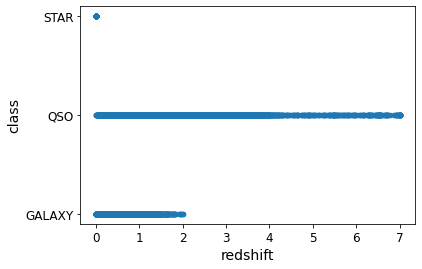

In [9]:
#scatterplot -> definition

stars.plot(x='redshift', y='class',kind='scatter')
plt.show()

In [40]:
#Start to define data and target variables
dataset=pd.read_csv(datapath + "star_classification.csv")

#nice output if you want to see your data
#dataset.describe()
#dataset.head()
#dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 14, 15, 16, 17]]

X = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 14, 15, 16, 17]]
y= dataset.iloc[ : , 13]

#X= dataset.iloc[ : , 0:11]
#y= dataset.iloc[ : , 13]

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

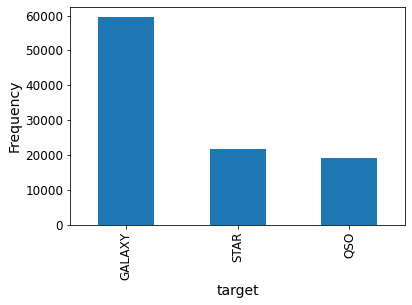

In [27]:
pd.value_counts(dataset['class']).plot.bar()
plt.xlabel('target')
plt.ylabel('Frequency')
dataset['class'].value_counts()

In [41]:
from imblearn.over_sampling import SMOTE
#Synthetic Minority Oversampling TEchnique - Oversampling technique that allows us to generate synthetic samples for our minority categories
#NEVER BALANCE THE TEST SET!!!!!!!!

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (80000, 17)
Number transactions y_train dataset:  (80000,)
Number transactions X_test dataset:  (20000, 17)
Number transactions y_test dataset:  (20000,)


In [ ]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

In [ ]:
#If you want to scale your data
from sklearn.preprocessing import MinMaxScaler

#normalization 
scl = MinMaxScaler(feature_range=(0, 1)) #you can use differnt range
X_train_res = scl.fit_transform(X_train_res)
x_test = scl.fit_transform(X_test)

#standardization - Standardization assumes that your observations fit a Gaussian distribution  

#from scipy.stats import shapiro
#for i in heart.columns:
   # print(f'{i}: {"Not Gaussian" if shapiro(heart[i])[1]<0.05 else "Gaussian"}  {shapiro(heart[i])}')

#from sklearn.preprocessing import StandardScalerScaler
#scaler = StandardScaler().fit(X_train_res)

#X_train_res = scaler.transform(X_train_res)
#x_test = scaler.transform(X_test)

#heart.hist(figsize=(10,10))
print(X_train_res)

In [ ]:
#feature selection supervised

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from numpy import set_printoptions

fs = SelectKBest(score_func=chi2,k=5)
fs.fit_transform(X_train_res, y_train_res)
#print(fs[:5])

X_new_train_res = fs.transform(X_train_res)
X_new_test = fs.transform(X_test)
print(X_new_train_res.shape)


X.columns[fs.get_support(indices=True)]

X.columns[fs.get_support(indices=True)].tolist()

In [ ]:
#feature selection unsupervised

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(1)
selector.fit(dataset)
dataset.columns[selector.get_support()]

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

tree_model = DecisionTreeClassifier(max_depth=2, random_state=42)
#The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

labels = np.unique(y_test)
print(confusion_matrix(y_test, y_pred, labels=labels))
print(classification_report(y_test, y_pred))

#Overall, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[11583   171   106]
 [  783  3013     1]
 [    0     0  4343]]
              precision    recall  f1-score   support

      GALAXY       0.94      0.98      0.96     11860
         QSO       0.95      0.79      0.86      3797
        STAR       0.98      1.00      0.99      4343

    accuracy                           0.95     20000
   macro avg       0.95      0.92      0.94     20000
weighted avg       0.95      0.95      0.95     20000

Accuracy: 0.94695


In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()

logisticRegr.fit(X_new_train_res, y_train_res)

predictions = logisticRegr.predict(X_new_test)

print(confusion_matrix(y_test, predictions))

#Overall, how often is the classifier correct?

print(classification_report(y_test, predictions))

In [43]:
from sklearn.naive_bayes import BernoulliNB

NB = BernoulliNB()

NB.fit(X_train, y_train)

predictions = NB.predict(X_test)

print(confusion_matrix(y_test, predictions))

#Overall, how often is the classifier correct?

print(classification_report(y_test, predictions))

[[11766     0    94]
 [ 3797     0     0]
 [ 1564     0  2779]]


C:\Users\Vincenzo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vincenzo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      GALAXY       0.69      0.99      0.81     11860
         QSO       0.00      0.00      0.00      3797
        STAR       0.97      0.64      0.77      4343

    accuracy                           0.73     20000
   macro avg       0.55      0.54      0.53     20000
weighted avg       0.62      0.73      0.65     20000



C:\Users\Vincenzo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

#labels = ['1', '0']
#cm = confusion_matrix(y_test, y_pred)
#print(cm)
#fig = plt.figure()
#ax = fig.add_subplot(111)
#cax = ax.matshow(cm)
#plt.title('Confusion matrix of the classifier')
#fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
#plt.xlabel('Predicted')
#plt.ylabel('True')
#plt.show()

#import pandas as pd
labels = np.unique(y_test)
a =  confusion_matrix(y_test, y_pred, labels=labels)

pd.DataFrame(a, index=labels, columns=labels)
#<- Predicted
#TP - FN
#FN - TN

In [ ]:
from sklearn.model_selection import GridSearchCV

#The minimum number of samples required to split an internal node
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
#Exhaustive search over specified parameter values for an estimator.
#Job to tun in parallel
#Determines the cross-validation splitting strategy
#Controls the verbosity: the higher, the more messages.
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

grid_search_cv.fit(X_new_train_res, y_train_res)

In [ ]:
#find best configuration
grid_search_cv.best_estimator_

In [ ]:
#result of optimization
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_new_test)
accuracy_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred, labels=labels))
print(classification_report(y_test, y_pred))

#labels = np.unique(y_test)
#a =  confusion_matrix(y_test, y_pred, labels=labels)

#pd.DataFrame(a, index=labels, columns=labels)

In [ ]:
#want to apply cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(tree_model, X, y, cv=3, scoring="accuracy")
#labels = np.unique(y_test)
#a =  confusion_matrix(y_test, y_pred, labels=labels)

#pd.DataFrame(a, index=labels, columns=labels)
#<- Predicted
#TP - FN
#FN - TN